Задача 1. Классификация KNN.
Цель: провести классификацию цветков ириса, обучив 2 классификатора: метод опорных векторов и метод k-ближайших соседей.
База данных - набор ирисов Фишера.

In [7]:
#выгрузим необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
#загрузим дата сет
iris = pd.read_csv('Iris.csv')
#проверим, все ли в порядке и нужно ли проводить предобработку
print(iris.head(10))
print(iris.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
m

In [13]:
#столбец ID не нужен, его нужно убрать. В остальном предобработка не требуется
iris.drop('Id', axis=1, inplace=True)

In [15]:
#выделим признаки и целевые переменные
X = iris.iloc[:, :-1].values  # Все строки и все столбцы, кроме последнего, признаки
y = iris['Species'].values #целевой столбец по имени


In [42]:
#разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [43]:
#посмотрим, что получилось

print(X_train)
print(y_train)

[[6.3 2.7 4.9 1.8]
 [5.  3.5 1.3 0.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.9 4.3 1.3]
 [6.7 3.1 4.7 1.5]
 [4.4 3.  1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.5 5.  1.9]
 [5.8 2.7 3.9 1.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.4 1.4 0.3]
 [6.3 2.9 5.6 1.8]
 [5.9 3.2 4.8 1.8]
 [7.2 3.2 6.  1.8]
 [4.6 3.6 1.  0.2]
 [6.  2.9 4.5 1.5]
 [6.8 3.  5.5 2.1]
 [7.4 2.8 6.1 1.9]
 [6.1 2.9 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.1 3.5 1.4 0.2]
 [5.5 2.4 3.8 1.1]
 [5.2 3.5 1.5 0.2]
 [6.3 2.3 4.4 1.3]
 [5.7 3.8 1.7 0.3]
 [6.7 3.1 5.6 2.4]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [6.5 2.8 4.6 1.5]
 [5.8 2.7 5.1 1.9]
 [6.2 2.8 4.8 1.8]
 [5.7 3.  4.2 1.2]
 [7.1 3.  5.9 2.1]
 [6.7 3.3 5.7 2.5]
 [5.5 2.5 4.  1.3]
 [6.4 3.1 5.5 1.8]
 [6.4 2.8 5.6 2.2]
 [4.3 3.  1.1 0.1]
 [6.9 3.1 5.4 2.1]
 [5.  3.2 1.2 0.2]
 [6.5 3.  5.2 2. ]
 [6.7 3.3 5.7 2.1]
 [5.1 3.8 1.9 0.4]
 [4.9 2.4 3.3 1. ]
 [5.1 3.8 1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.8 4.  1.2 0.2]
 [5.8 2.7 4.1 1. ]
 [5.4 3.  4.5 1.5]
 [6.3 3.4 5.6 2.4]
 [6.3 3.3 6.  2.5]
 [4.5 2.3 1.

In [44]:
# Создаем и обучаем модель KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Делаем предсказания для KNN
y_pred_knn = knn.predict(X_test)

In [46]:
# Оцениваем точность KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN: {accuracy_knn:.2f}")

Accuracy of KNN: 0.97


In [47]:
# Кросс-валидация для KNN
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn, X, y, cv=5)  # 5 фолдов
print(f"Mean accuracy of KNN: {knn_scores.mean():.2f} ± {knn_scores.std():.2f}")

Mean accuracy of KNN: 0.97 ± 0.02


In [48]:
# Матрица ошибок для KNN
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(confusion_knn)

Confusion Matrix for KNN:
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [49]:
# Отчет о классификации для KNN
report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN:")
print(report_knn)

Classification Report for KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [56]:
# Создаем и обучаем модель SVM
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [57]:
# Делаем предсказания для SVM
y_pred_svm = svm.predict(X_test)

In [58]:
# Оцениваем точность SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.2f}")

Accuracy of SVM: 0.93


In [59]:
# Кросс-валидация для SVM
svm_scores = cross_val_score(svm, X, y, cv=5)  # 5 фолдов
print(f"Mean accuracy of SVM: {svm_scores.mean():.2f} ± {svm_scores.std():.2f}")

Mean accuracy of SVM: 0.97 ± 0.02


In [60]:
# Матрица ошибок для SVM
confusion_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(confusion_svm)

Confusion Matrix for SVM:
[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]


In [61]:
# Отчет о классификации для SVM
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:")
print(report_svm)

Classification Report for SVM:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



Интерпретация результатов:
В целом оба классификатора демонстрируют отличные результаты с высокой точностью. Точность KNN - 0,97, что подтвердила кросс-валидация; точность SVM - 0,93, однако по кросс-валидации - 0,98.
Дополнительно была рассчитана матрица ошибок, согласно которой KNN имеет одну ошибку в классификации класса 2, тогда как SVM имеет две ошибки: одну в классификации класса 1 и одну в классификации класса 2. Это же подтверждает отчет о классификации.
В результате, учитывая специфику данных (четкая структура и отсутствие шумов) классификатор KNN оказался более точным.

Задача 2. Метод KNN. Цель: обучить модель на наборе данных Фишера и наборе данных о диабете. Визуализировать полученные результаты.

In [81]:
#выгрузим необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [66]:
#преобразуем дата сет по ирисам в дата фрейм, чтобы посмотреть на него
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.head())
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [68]:
#разделим выборку первого дата сета на обучающую и тестовую
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [70]:
#поскольку целевая переменная при обучении модели на первом дата сете категориальная, воспользуемся методом классификации через библиотеку sklearn
#обучаем модель
sk_knn_clf = KNeighborsClassifier()
sk_knn_clf.fit(X1_train, y1_train)
#предсказываем
sk_knn_clf_pred_res = sk_knn_clf.predict(X1_test)
#выводим метрику ошибки ACC
sk_knn_clf_accuracy = accuracy_score(y1_test, sk_knn_clf_pred_res)

print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
print(sk_knn_clf_pred_res)

sk KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [74]:
#посмотрим на матрицу ошибок
conf_matrix = confusion_matrix(y1_test, sk_knn_clf_pred_res)
print("Confusion Matrix for KNN:")
print(conf_matrix)

Confusion Matrix for KNN:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


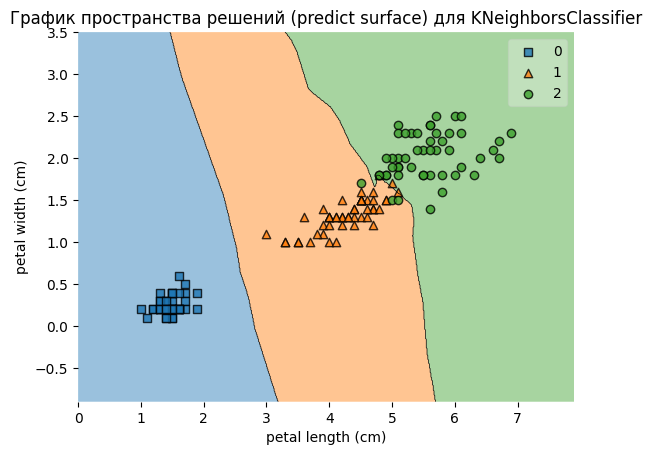

In [75]:
#визуализируем полученные результаты в виде графика пространства решений
feature_indexes = [2, 3]
title1 = 'График пространства решений (predict surface) для KNeighborsClassifier'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_knn_clf, feature_indexes, title1)

In [76]:
#преобразуем дата сет по диабету в дата фрейм, чтобы посмотреть на него
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
print(diabetes_df.head())
print(diabetes_df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164

In [77]:
#разделим выборку второго дата сета на тестовую и обучающую
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [78]:
#поскольку целевая переменная при обучении модели на втором дата сете числовая, воспользуемся методом регрессии через библитеку sklearn
#обучаем модель
sk_knn_reg = KNeighborsRegressor()
sk_knn_reg.fit(X2_train, y2_train)
#предсказываем
sk_knn_reg_pred_res = sk_knn_reg.predict(X2_test)
#выводим метрику ошибки r2
sk_knn_reg_r2 = r2_score(y2_test, sk_knn_reg_pred_res)

print(f'sk KNN regressor R2 score: {sk_knn_reg_r2}')
print(sk_knn_reg_pred_res)

sk KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]


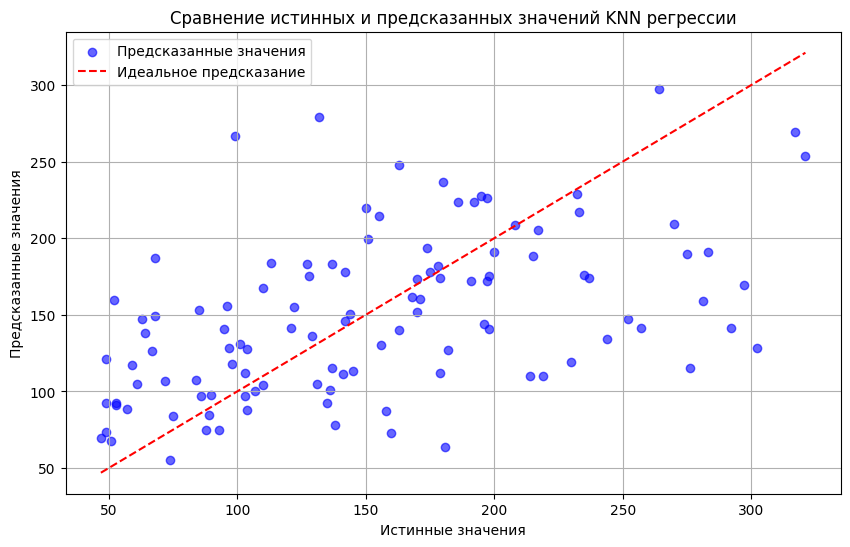

In [86]:
#визуализируем истинные значения против предсказанных
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, sk_knn_reg_pred_res, color='blue', label='Предсказанные значения', alpha=0.6)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linestyle='--', label='Идеальное предсказание')
plt.title('Сравнение истинных и предсказанных значений KNN регрессии')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()
plt.show()

Интерпретация результатов: метод классификации на датаете "Ирис" показал высокую точность. Согласно метрике, она составила 0,97. Матрица ошибок также показала только 1 ошибку в классификации класса 2. Метод регрессии на датасете "Диабет" показал неточные результаты. Коэффициент детерминации - всего 0,18, а это значит, что модель объясняет незначительные вариации целевой переменной. То же самое видно на графике истинных значений против предсказанных: большинство предсказанных значений находятся далеко от истинных значений (красная пунктирная линия), и лишь в немногих случаях предсказание оказалось точным.